In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
from numpy import array

Enter no.of stocks to be compared:
None2
Enter the stock name:
NoneAAPL
[*********************100%%**********************]  1 of 1 completed
Enter the stock name:
NoneAMZN
[*********************100%%**********************]  1 of 1 completed
[                Close
Date                 
2010-01-04   7.643214
2010-01-05   7.656429
2010-01-06   7.534643
2010-01-07   7.520714
2010-01-08   7.570714
...               ...
2019-12-24  71.067497
2019-12-26  72.477501
2019-12-27  72.449997
2019-12-30  72.879997
2019-12-31  73.412498

[2516 rows x 1 columns],                 Close
Date                 
2010-01-04   6.695000
2010-01-05   6.734500
2010-01-06   6.612500
2010-01-07   6.500000
2010-01-08   6.676000
...               ...
2019-12-24  89.460503
2019-12-26  93.438499
2019-12-27  93.489998
2019-12-30  92.344498
2019-12-31  92.391998

[2516 rows x 1 columns]]


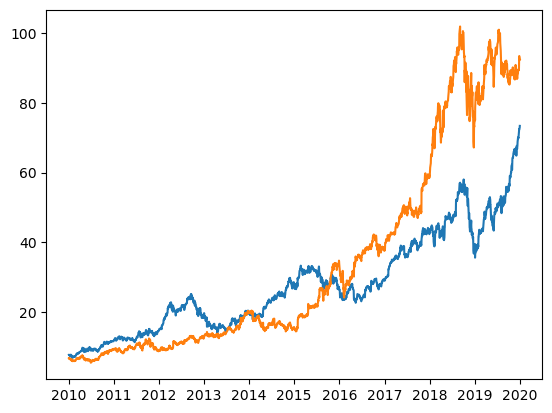

In [3]:
#read data from user and consider those company stocks
count=int(input(print("Enter no.of stocks to be compared:")))
company=[]
while count!=0:
    user_input=input(print("Enter the stock name:"))
    stock= yf.Ticker(user_input)
    start_date='2010-01-01'
    end_date='2020-01-01'
    df1=yf.download(user_input,start=start_date,end=end_date)
    df1=df1[['Close']]
    plt.plot(df1.index,df1['Close'])
    company.append(df1)
    count-=1
print(company)

In [17]:
#data pre processing and cleaning of data
i=0
for df in company:
    x=scaler.fit_transform(np.array(df).reshape(-1,1))
    company[i]=x
    i+=1

done
done


array([[0.01178427],
       [0.01198282],
       [0.01015293],
       ...,
       [0.98553794],
       [0.99199891],
       [1.        ]])

In [18]:
#training and test data split
train=[]
test=[]
training_size=int(len(company[0])*0.65)
test_size=len(company[0])-training_size

In [20]:
for df1 in company:
    train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
    train.append(train_data)
    test.append(test_data)
print(train)

[array([[0.01178427],
       [0.01198282],
       [0.01015293],
       ...,
       [0.24850012],
       [0.2515428 ],
       [0.25605044]]), array([[0.01309752],
       [0.01350665],
       [0.012243  ],
       ...,
       [0.3103941 ],
       [0.31435598],
       [0.31436633]])]


In [21]:
#creating a dataset function 
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [24]:
time_step=100
for i in range(0,len(train)):
    X_train, y_train = create_dataset(train[i], time_step)
    X_test, ytest = create_dataset(test[i], time_step)
    X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
    X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
#Create the LSTM stacked model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/10
24/24 [==============================] - 4s 164ms/step - loss: 1.4789e-04 - val_loss: 0.0011
Epoch 2/10
24/24 [==============================] - 5s 228ms/step - loss: 1.4133e-04 - val_loss: 0.0011
Epoch 3/10
24/24 [==============================] - 5s 209ms/step - loss: 1.4472e-04 - val_loss: 9.2269e-04
Epoch 4/10
24/24 [==============================] - 5s 218ms/step - loss: 1.4254e-04 - val_loss: 9.6478e-04
Epoch 5/10
24/24 [==============================] - 5s 217ms/step - loss: 1.4186e-04 - val_loss: 0.0010
Epoch 6/10
24/24 [==============================] - 5s 214ms/step - loss: 1.5172e-04 - val_loss: 8.5430e-04
Epoch 7/10
24/24 [==============================] - 6s 234ms/step - loss: 1.6196e-04 - val_loss: 0.0011
Epoch 8/10
24/24 [==============================] - 6s 231ms/step - loss: 1.3651e-04 - val_loss: 0.0011
Epoch 9/10
24/24 [==============================] - 5s 217ms/step - loss: 1.3193e-04 - val_loss: 9.8418e-04
Epoch 10/10
25/25 [=============================

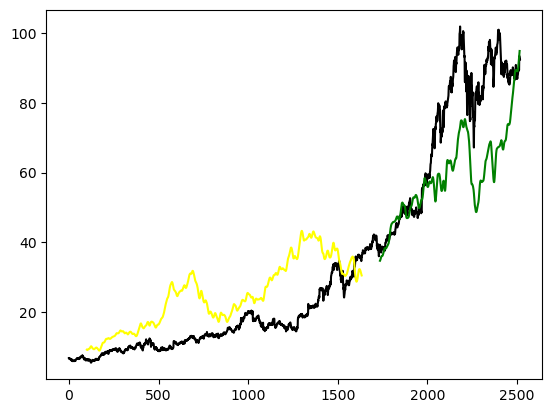

Epoch 1/10
24/24 [==============================] - 5s 205ms/step - loss: 7.4789e-05 - val_loss: 0.0013
Epoch 2/10
24/24 [==============================] - 5s 231ms/step - loss: 6.5620e-05 - val_loss: 8.6790e-04
Epoch 3/10
24/24 [==============================] - 6s 255ms/step - loss: 6.8456e-05 - val_loss: 0.0015
Epoch 4/10
24/24 [==============================] - 5s 229ms/step - loss: 7.2842e-05 - val_loss: 8.1388e-04
Epoch 5/10
24/24 [==============================] - 5s 224ms/step - loss: 7.1940e-05 - val_loss: 0.0010
Epoch 6/10
24/24 [==============================] - 5s 217ms/step - loss: 6.6763e-05 - val_loss: 8.9411e-04
Epoch 7/10
24/24 [==============================] - 5s 211ms/step - loss: 6.3545e-05 - val_loss: 0.0011
Epoch 8/10
24/24 [==============================] - 5s 216ms/step - loss: 6.5395e-05 - val_loss: 8.1656e-04
Epoch 9/10
24/24 [==============================] - 5s 212ms/step - loss: 6.3058e-05 - val_loss: 0.0010
Epoch 10/10
25/25 [=============================

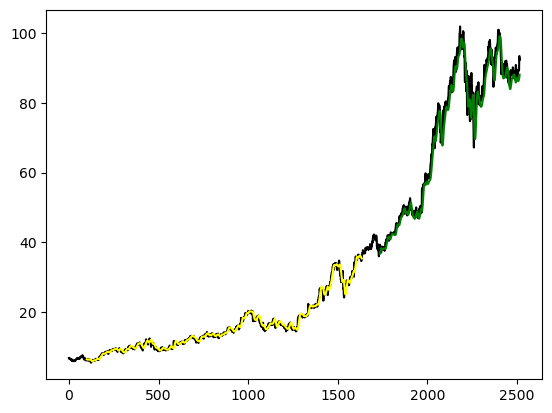

In [29]:
#train the model with values
time_step=100
for i in range(0,len(train)):
    X_train, y_train = create_dataset(train[i], time_step)
    X_test, ytest = create_dataset(test[i], time_step)
    X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
    X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
    model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=10,batch_size=64,verbose=1)
    #predicting the values
    train_predict=model.predict(X_train)
    test_predict=model.predict(X_test)
    ##Transformback to original form
    train_predict=scaler.inverse_transform(train_predict)
    test_predict=scaler.inverse_transform(test_predict)
    look_back=100
    trainPredictPlot = np.empty_like(company[i])
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
    # shift test predictions for plotting
    testPredictPlot = np.empty_like(company[i])
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(train_predict)+(look_back*2)+1:len(company[i])-1, :] = test_predict
    # plot baseline and predictions
    plt.plot(scaler.inverse_transform(df1),color='Black')
    plt.plot(trainPredictPlot,color='Yellow')
    plt.plot(testPredictPlot,color='Green')
    plt.show()
    

In [30]:
#Now for the prediction of stock data 
days=int(input(print("No.of days need to be predicted:")))
result=[]
for i in range(0,len(test)):
    x_input=test[i][781:].reshape(1,-1)
    temp_input=list(x_input)
    temp_input=temp_input[0].tolist()
    lst_output=[]
    n_steps=100
    i=0
    while(i<days):

        if(len(temp_input)>100):
            #print(temp_input)
            x_input=np.array(temp_input[1:])
            print("{} day input {}".format(i,x_input))
            x_input=x_input.reshape(1,-1)
            x_input = x_input.reshape((1, n_steps, 1))
            #print(x_input)
            yhat = model.predict(x_input, verbose=0)
            print("{} day output {}".format(i,yhat))
            temp_input.extend(yhat[0].tolist())
            temp_input=temp_input[1:]
            #print(temp_input)
            lst_output.extend(yhat.tolist())
            i=i+1
        else:
            x_input = x_input.reshape((1, n_steps,1))
            yhat = model.predict(x_input, verbose=0)
            print(yhat[0])
            temp_input.extend(yhat[0].tolist())
            print(len(temp_input))
            lst_output.extend(yhat.tolist())
            i=i+1
    df=company[i].tolist()
    df.extend(lst_output)
    result.append(df)
    #result.append(lst_output)--> for only predicted data


No.of days need to be predicted:
None100
[0.9606909]
101
1 day input [0.65001878 0.6819104  0.65854576 0.65475184 0.67263216 0.68709421
 0.68713176 0.69569628 0.69502016 0.65813256 0.67259461 0.66384226
 0.66898847 0.68206063 0.68104645 0.66962705 0.68273681 0.69810036
 0.69802521 0.70144353 0.71094714 0.73682855 0.73495036 0.71864772
 0.72296753 0.72597263 0.73374835 0.72694933 0.7148162  0.71853503
 0.71462837 0.72721224 0.72292998 0.71891069 0.73825599 0.74058492
 0.71943658 0.72642344 0.74967534 0.74986317 0.7398712  0.74975048
 0.76124497 0.78423401 0.7829568  0.78089084 0.77732224 0.78074055
 0.78498527 0.80038637 0.79832041 0.81041587 0.81191846 0.82318757
 0.83246582 0.81082908 0.81071639 0.83137644 0.85789648 0.86420716
 0.86281732 0.86323046 0.87145693 0.87412403 0.88186215 0.88096055
 0.89038908 0.88351497 0.89523483 0.90026836 0.8972257  0.88558092
 0.88114843 0.88028443 0.89752616 0.88971296 0.90304803 0.90083179
 0.88922461 0.87153213 0.88013414 0.8945586  0.9138288  0.89

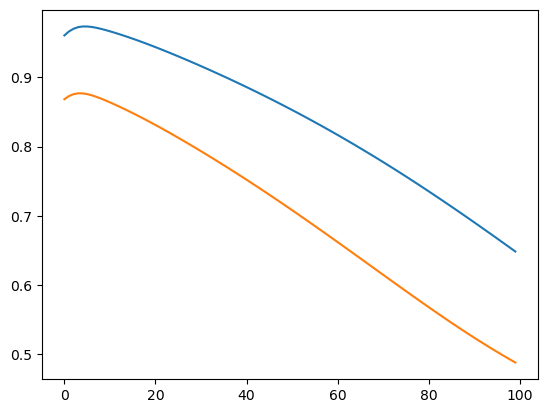

In [31]:
for graph in result:
    plt.plot(graph)